## Problem Statement

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv("C:/Users/hp/Projects/train.csv")
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df_test=pd.read_csv("C:/Users/hp/Projects/test.csv")
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
df= df_train.append(df_test)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


### Data Cleaning

In [7]:
df.drop(["User_ID"],axis=1,inplace=True)

In [8]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [9]:
# handling categorical data gander
# df["Gender"]=pd.get_dummies(df["Gender"],drop_first=1)
df["Gender"]=df["Gender"].map({"F":0,"M":1})

In [10]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
# handling categorical data gander
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df["Age"]=df["Age"].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7})

In [13]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [14]:
# from sklearn import preprocessing

# # label encoder object knows to understand words labels
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in columns species
# df["Age"] = label_encoder.fit_transform(df["Age"])
# df["Age"].unique()

In [15]:
df_city=pd.get_dummies(df["City_Category"],drop_first=True)

In [16]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [17]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
df.drop("City_Category",axis=1,inplace=True)
df.drop("Product_ID",axis=1,inplace=True)

In [19]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [20]:
# missing values
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [21]:
# Repacing Missing Values
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [23]:
# Cat - dis replace missing value with mode

df["Product_Category_2"]= df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [24]:
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [25]:
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [26]:
df["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [27]:
df["Product_Category_3"]= df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [28]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [29]:
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [30]:
df.shape

(783667, 11)

In [31]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [32]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")

<ipython-input-32-d114f8657c51>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")


In [33]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


### Convert object into integers


In [35]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype(int)

In [36]:
df["B"]=df["B"].astype(int)

df["C"]=df["C"].astype(int)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


## Exploratory Data Analysis 


In [38]:
#Vizualisation
# sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

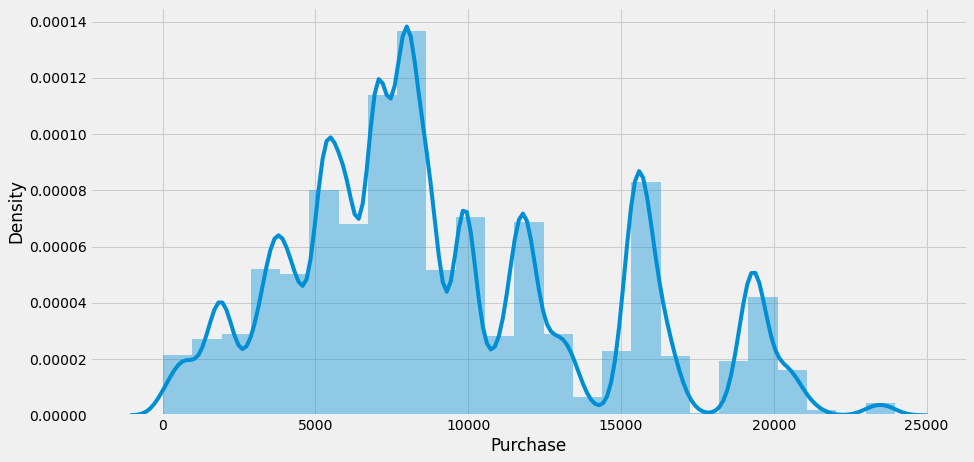

In [39]:
# displot for purchase

plt.style.use("fivethirtyeight")
plt.figure(figsize=(14,7))
sns.distplot(df["Purchase"],bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

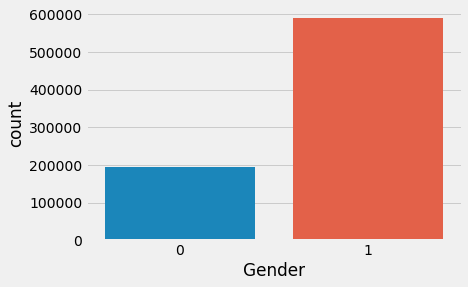

In [40]:
sns.countplot(df["Gender"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

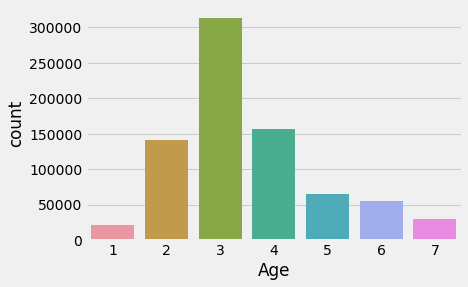

In [41]:
 sns.countplot(df["Age"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

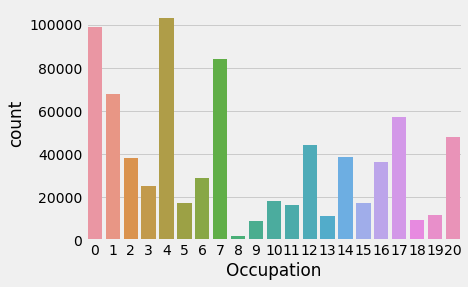

In [42]:
 sns.countplot(df["Occupation"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

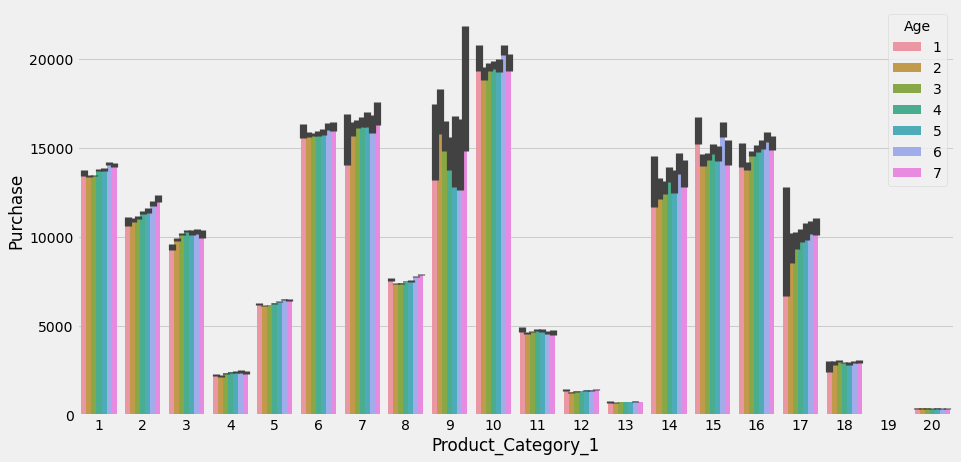

In [43]:
plt.figure(figsize=(14,7))
sns.barplot("Product_Category_1","Purchase",hue="Age",data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

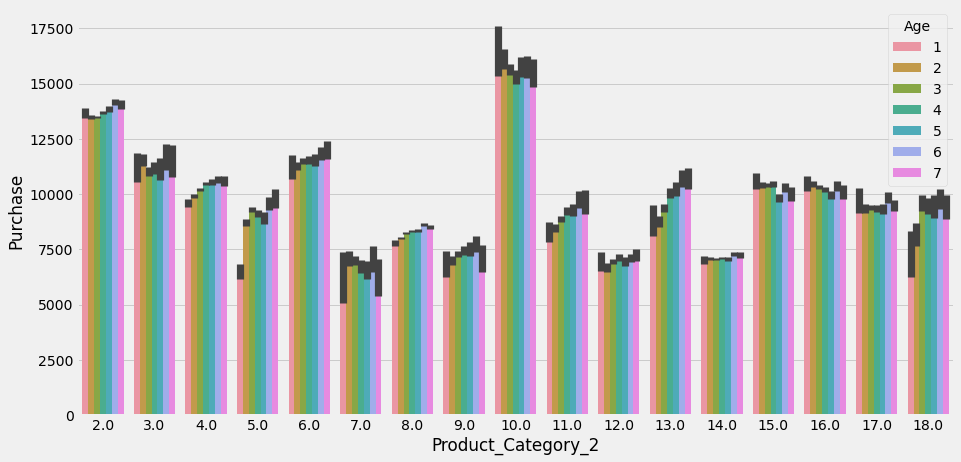

In [44]:
plt.figure(figsize=(14,7))
sns.barplot("Product_Category_2","Purchase",hue="Age",data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

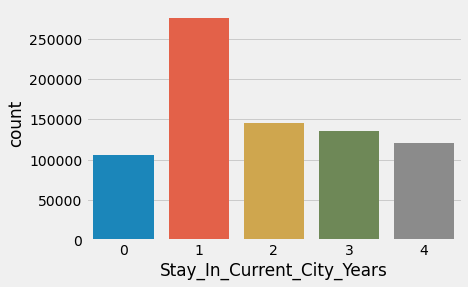

In [45]:
 sns.countplot(df["Stay_In_Current_City_Years"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

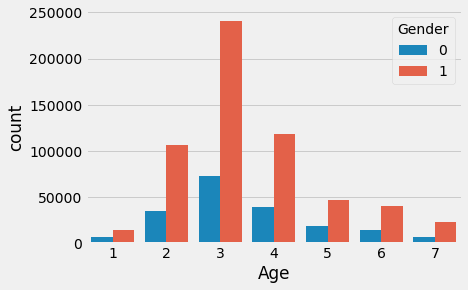

In [46]:
 sns.countplot(df["Age"],hue=df["Gender"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

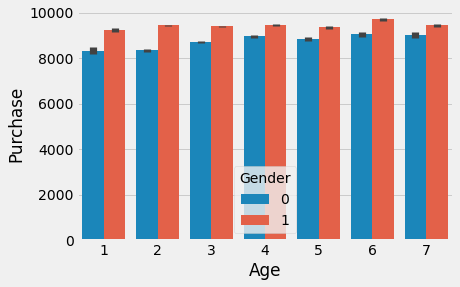

In [47]:
# Vizualisation Of Age vs Purcahse
sns.barplot("Age","Purchase",hue="Gender",data=df)

 Purcahse of men over women is high

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

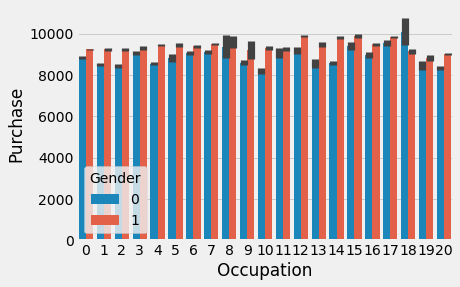

In [48]:
sns.barplot("Occupation","Purchase",hue="Gender",data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

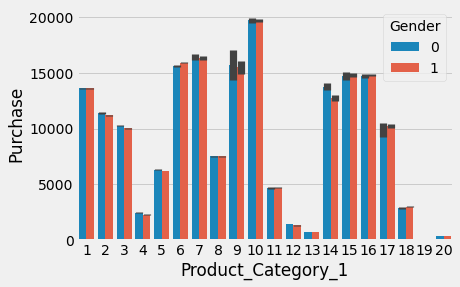

In [49]:
sns.barplot("Product_Category_1","Purchase",hue="Gender",data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

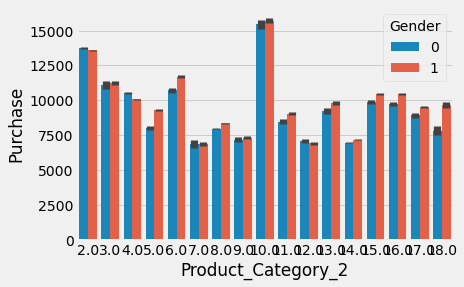

In [50]:
sns.barplot("Product_Category_2","Purchase",hue="Gender",data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

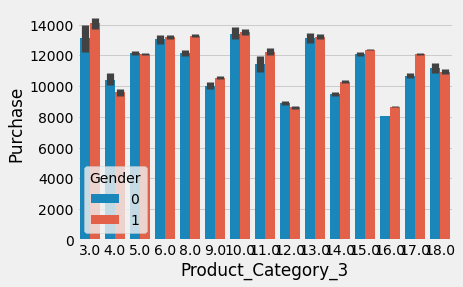

In [51]:
sns.barplot("Product_Category_3","Purchase",hue="Gender",data=df)

## Feature Scalling


In [52]:
df_test= df[df["Purchase"].isnull()]

In [53]:
df_train= df[~df["Purchase"].isnull()]

In [54]:
#Splitting Dependent and Independent variable

y=df_train['Purchase']# Dependent Variable
X=df_train.drop(columns=['Purchase'],axis=1)#Independent Variable

In [55]:
X

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,0,1


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=88)

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [58]:
X_train

array([[ 0.57146536, -0.36711775, -0.47253658, ...,  0.36863011,
         1.17412345, -0.67166566],
       [ 0.57146536, -1.10633515,  1.3664585 , ...,  0.00334315,
        -0.8516992 , -0.67166566],
       [ 0.57146536,  1.11131706, -0.1660374 , ...,  0.36863011,
         1.17412345, -0.67166566],
       ...,
       [ 0.57146536, -0.36711775, -0.1660374 , ...,  0.36863011,
        -0.8516992 ,  1.48883597],
       [ 0.57146536, -0.36711775, -0.77903576, ...,  0.36863011,
        -0.8516992 ,  1.48883597],
       [ 0.57146536, -1.84555256,  0.29371137, ...,  0.36863011,
         1.17412345, -0.67166566]])

In [59]:
X_test

array([[-1.74988734,  0.37209966,  0.14046178, ...,  0.36863011,
        -0.8516992 ,  1.48883597],
       [ 0.57146536, -1.10633515, -0.62578617, ...,  0.36863011,
        -0.8516992 , -0.67166566],
       [ 0.57146536,  0.37209966, -1.23878453, ..., -2.55366552,
        -0.8516992 ,  1.48883597],
       ...,
       [ 0.57146536, -0.36711775, -0.31928699, ...,  0.36863011,
         1.17412345, -0.67166566],
       [ 0.57146536, -0.36711775,  1.3664585 , ..., -2.55366552,
         1.17412345, -0.67166566],
       [ 0.57146536, -0.36711775, -1.23878453, ...,  0.73391706,
        -0.8516992 ,  1.48883597]])

In [60]:
y_train.value_counts(normalize=True)

7012.0     0.000377
6891.0     0.000364
6879.0     0.000356
7193.0     0.000348
6855.0     0.000348
             ...   
18463.0    0.000003
17191.0    0.000003
23655.0    0.000003
11108.0    0.000003
7290.0     0.000003
Name: Purchase, Length: 17402, dtype: float64

In [61]:
y_test.value_counts(normalize=True)

7046.0     0.000418
7830.0     0.000412
7166.0     0.000412
7165.0     0.000412
7027.0     0.000394
             ...   
2639.0     0.000006
9008.0     0.000006
18743.0    0.000006
14474.0    0.000006
21567.0    0.000006
Name: Purchase, Length: 15474, dtype: float64

In [62]:
X_train.shape , y_train.shape

((385047, 10), (385047,))

In [63]:
X_test.shape , y_test.shape

((165021, 10), (165021,))

In [64]:
from sklearn.feature_selection import mutual_info_regression

mutual_info=mutual_info_regression(X_train,y_train)
mutual_info

array([5.83147578e-03, 5.45522302e-03, 9.08789762e-03, 2.61693060e-03,
       7.16165573e-04, 1.66837163e+00, 4.61254689e-01, 1.96547240e-01,
       1.63302366e-03, 5.20011654e-03])

In [65]:
corr1=df.corr()

<AxesSubplot:>

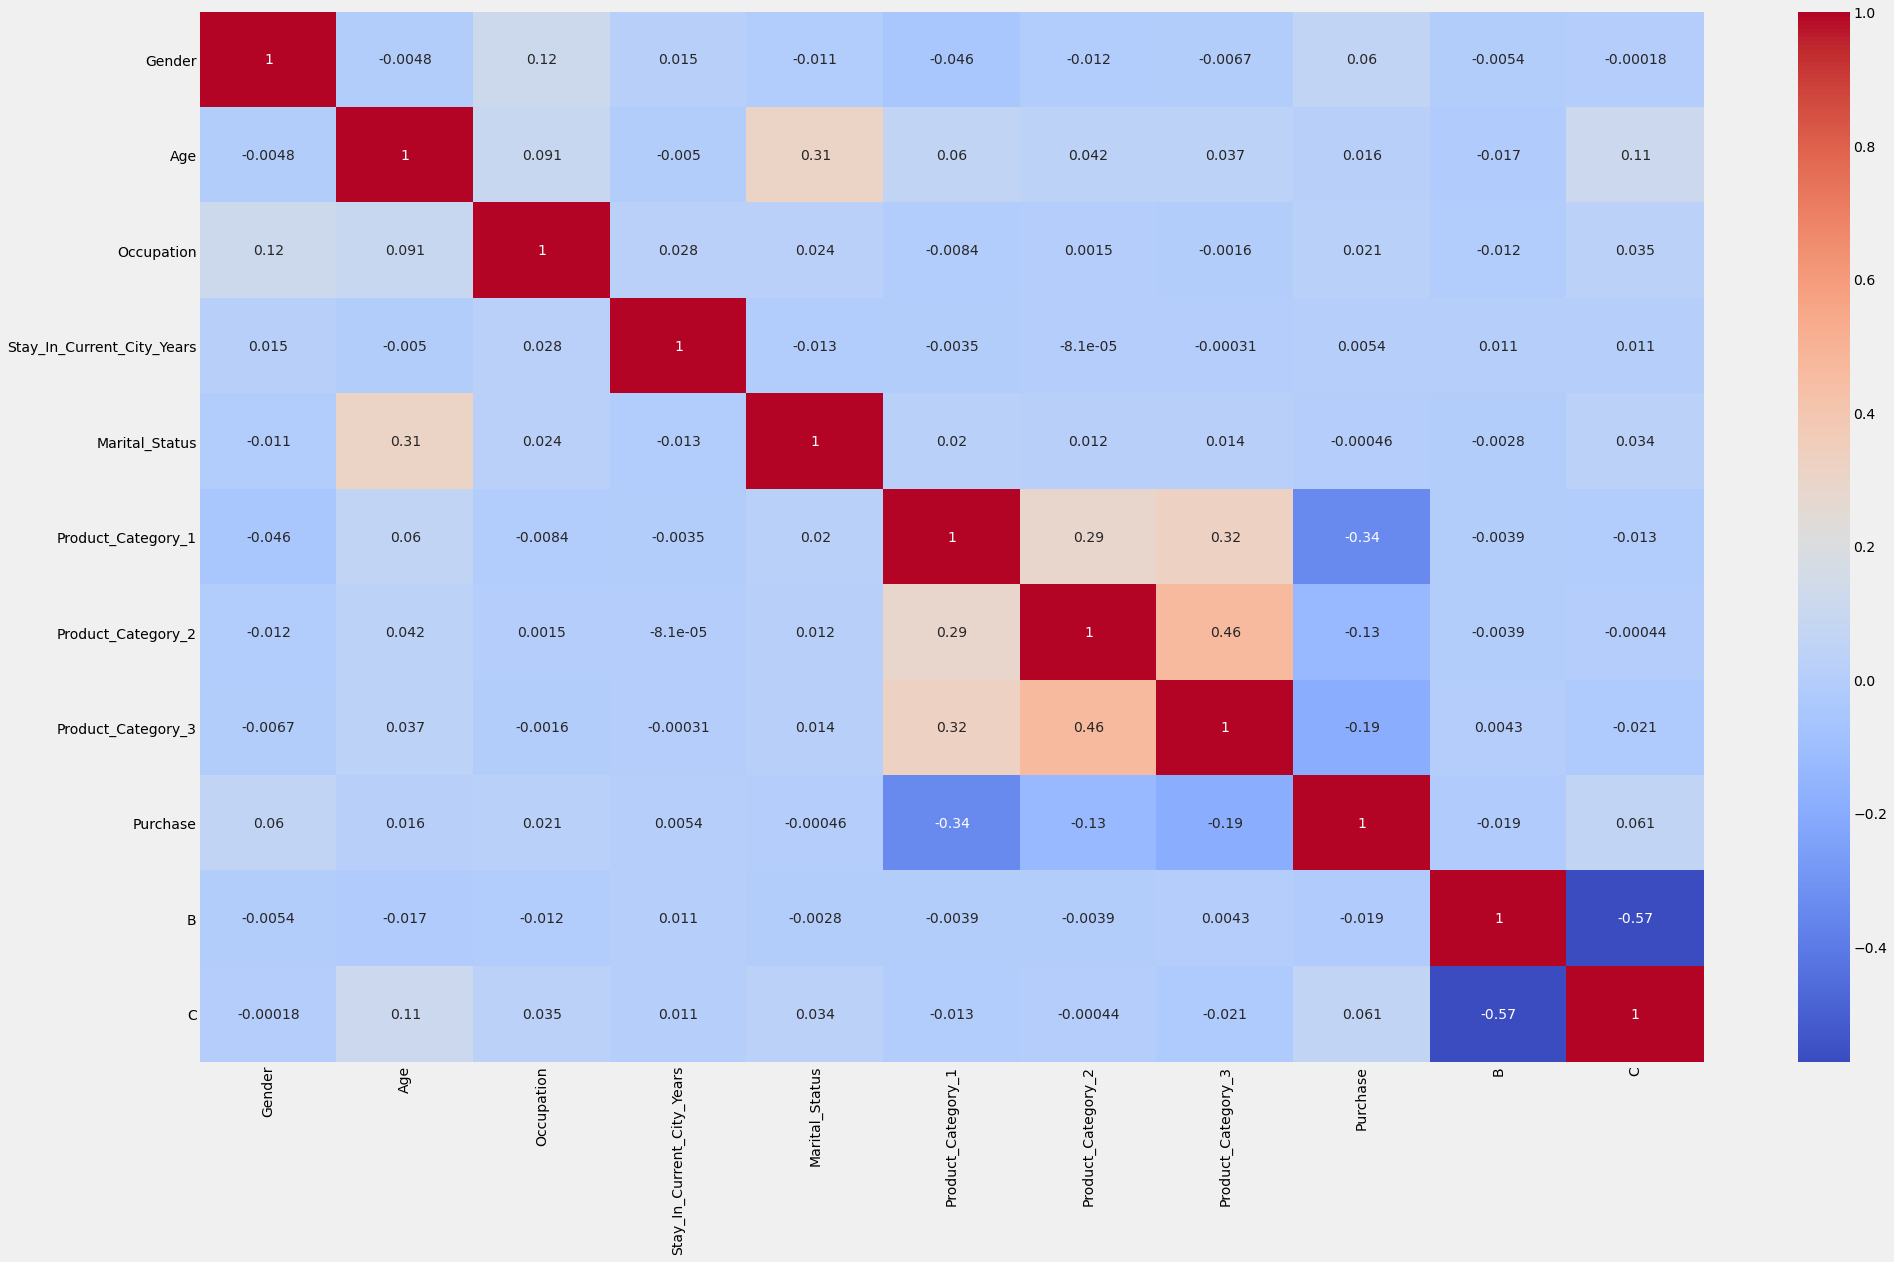

In [66]:
plt.figure(figsize=(30,18))
sns.heatmap(corr1, cmap='coolwarm',annot= True)

## Model Creation

#### Linear Regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
X_train , X_test, y_train , y_test=train_test_split(X,y, test_size=0.3, random_state=88)

In [69]:
X_train.shape , y_train.shape

((385047, 10), (385047,))

In [70]:
X_test.shape , y_test.shape

((165021, 10), (165021,))

In [71]:
Lr1=LinearRegression()
Lr1.fit(X_train, y_train)

LinearRegression()

In [72]:
print("Train Score ", Lr1.score(X_train, y_train)) 

Train Score  0.13131473708898578


In [73]:
print("Train Score ", Lr1.score(X_test, y_test))

Train Score  0.13107451907208512


In [74]:
y_pred_train=Lr1.predict(X_train)
y_pred_train

array([ 9168.83395619, 10778.38041091, 11046.1775388 , ...,
        8534.8960022 ,  8519.60503087, 10620.23647467])

In [75]:
y_pred_test=Lr1.predict(X_test)
y_pred_test

array([ 7318.78031181, 10130.36197516, 11478.29708561, ...,
        9186.7860509 , 12102.95988569, 11167.97932423])

In [76]:
print("Train MSE", np.mean((y_train-y_pred_train)**2))
print("Test MSE", np.mean((y_test-y_pred_test)**2))

Train MSE 21902891.312449962
Test MSE 21958988.659973606


In [77]:
from sklearn import metrics
print('Train MAE :',metrics.mean_absolute_error(y_train,y_pred_train))
print('Test MAE:', metrics.mean_absolute_error(y_test,y_pred_test))

Train MAE : 3577.3771809081
Test MAE: 3585.288305362778


#### DecisionTree

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
dt2=DecisionTreeRegressor(min_samples_leaf=250 , max_depth=20, min_samples_split= 100)
dt2.fit(X_train, y_train)
print("Train accuracy:", dt2.score(X_train,y_train))
print("Test accuracy:", dt2.score(X_test,y_test))

Train accuracy: 0.6592396455154741
Test accuracy: 0.6552412577379382


In [80]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'criterion':("mse", "mae"), 
#               'min_samples_split':[150,200,250], 
#               'max_depth':[30,35,40,45,50,55,60],
#               "min_samples_leaf":[50,100,150]
     
#              }

# tr = DecisionTreeRegressor(random_state=89)

# gsearch = GridSearchCV(estimator=tr, param_grid=pa
                       
                       
                       
#                        rameters, cv=10, verbose=1, n_jobs=-1)

# gsearch.fit(X_train, y_train)

In [81]:
dt3 = DecisionTreeRegressor(max_depth= 30 ,criterion= 'mse' ,
                            min_samples_leaf= 50, 
                            min_samples_split=200)

dt3.fit(X_train,y_train)
print("Train accuracy :" ,dt3.score(X_train,y_train))
print("Test accuracy :" ,dt3.score(X_test,y_test))

Train accuracy : 0.6710126863019565
Test accuracy : 0.6586166699470344


In [82]:
pred_train=dt3.predict(X_train)  
pred_test=dt3.predict(X_test)

In [83]:
print("Train MSE", np.mean((y_train-pred_train)**2))
print("Test MSE", np.mean((y_test-pred_test)**2))

Train MSE 8295033.521066614
Test MSE 8627244.6117378


In [84]:
print("Train RMSE", np.sqrt(np.mean((y_train-pred_train)**2)))
print("Test RMSE", np.sqrt(np.mean((y_test-pred_test)**2)))

Train RMSE 2880.1099841961964
Test RMSE 2937.217154338065


In [85]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_test ))
print('MSE:', metrics.mean_squared_error(y_test,pred_test))

MAE: 2183.2763593893483
MSE: 8627244.611738006


####  RandomForest


In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf1=RandomForestRegressor(min_samples_leaf=500 , max_depth=60, min_samples_split= 80)
rf1.fit(X_train, y_train)
print("Train accuracy:", rf1.score(X_train,y_train))
print("Test accuracy:", rf1.score(X_test,y_test))

Train accuracy: 0.6510580105356132
Test accuracy: 0.6499415465406977


In [88]:
# fit_rf = RandomForestRegressor(random_state=42)

# param_dist = {'max_depth':[7,10],
#               'min_samples_split':[6,10],
#               'n_estimators':[ 50, 100],
#               'bootstrap': [True, False],
# #               'max_features': ['auto', 'log2', None],
#               'criterion': ["mse","mae"]}

# cv_rf = GridSearchCV(fit_rf, cv = 5,
#                      param_grid=param_dist, 
#                      n_jobs = -1, verbose=1)

# cv_rf.fit(X_train, y_train)

In [89]:
# cv_rf.best_params_

In [90]:
# cv_rf.best_score_

In [91]:
# rf1=RandomForestRegressor(n_estimators=cv_rf.best_params_['n_estimators'],
#                            max_depth=cv_rf.best_params_['max_depth'], 
#                            criterion=cv_rf.best_params_["criterion"],
#                            min_samples_split=cv_rf.best_params_["min_samples_split"]
#                           )
# rf1.fit(X_train, y_train)
# print("Train Accuracy :", rf1.score(X_train,y_train))
# print("Test Accuracy :", rf1.score(X_test,y_test))

In [92]:
rf2 = RandomForestRegressor(max_depth= 7 ,criterion= 'mse' ,
                            min_samples_leaf= 50, 
                            min_samples_split=10)

rf2.fit(X_train,y_train)
print("Train accuracy :" ,rf2.score(X_train,y_train))
print("Test accuracy :" ,rf2.score(X_test,y_test))

Train accuracy : 0.6496799919286879
Test accuracy : 0.6488931049531097


In [93]:
pred_train_rf=rf2.predict(X_train)
pred_test_rf=rf2.predict(X_test)

In [94]:
print("Train MSE", np.mean((y_train-pred_train_rf)**2))
print("Test MSE", np.mean((y_test-pred_test_rf)**2))

Train MSE 8832912.665802604
Test MSE 8872972.994807284


In [95]:
print("Train RMSE", np.sqrt(np.mean((y_train-pred_train_rf)**2)))
print("Test RMSE", np.sqrt(np.mean((y_test-pred_test_rf)**2)))

Train RMSE 2972.0216462540448
Test RMSE 2978.7535975315723


In [96]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,pred_test_rf ))
print('MSE:', metrics.mean_squared_error(y_test,pred_test_rf))

MAE: 2247.4559937199174
MSE: 8872972.99480728


In [97]:
rf2.feature_importances_

array([1.29908166e-04, 4.91121509e-04, 3.97894147e-04, 1.06373007e-04,
       4.33928398e-05, 9.80336994e-01, 7.40810246e-03, 7.08942143e-03,
       6.20093688e-05, 3.93478290e-03])

In [98]:
X_train.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'B', 'C'],
      dtype='object')

#### Xgboost


In [100]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [101]:
import xgboost as XGB
from xgboost.sklearn import XGBRegressor


In [102]:
xgb_reg = XGBRegressor(learning_rate=0.05, max_depth=50, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=50, min_child_weight=40, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
y_pred_train=xgb_reg.predict(X_train)
y_pred_train

array([ 6472.2563, 12846.019 , 15912.491 , ...,  7441.057 ,  8597.918 ,
       12528.317 ], dtype=float32)

In [104]:
y_pred_test=xgb_reg.predict(X_test)
y_pred_test

array([19896.812 ,  8156.7314,  2711.6016, ...,  6226.684 , 15754.923 ,
       15119.877 ], dtype=float32)

In [105]:
print("Train Score ", xgb_reg.score(X_train, y_train)) 
print("Test Score ", xgb_reg.score(X_test, y_test))

Train Score  0.7170787859491299
Test Score  0.6701387917254298


In [106]:
print("Train MSE", np.mean((y_train-y_pred_train)**2))
print("Test MSE", np.mean((y_test-y_pred_test)**2))

Train MSE 7133530.2507377155
Test MSE 8336064.128460089


In [107]:
from sklearn import metrics

print('Train MAE :', metrics.mean_absolute_error(y_train,y_pred_train))

print('Test MAE:', metrics.mean_absolute_error(y_test,y_pred_test))

Train MAE : 1986.6276675142826
Test MAE: 2141.0772694932207


In [108]:
from sklearn.ensemble import AdaBoostRegressor

In [109]:
clf_ABR = AdaBoostRegressor(n_estimators=150,
                            learning_rate=0.03,
                           random_state=88)

In [110]:
clf_ABR=clf_ABR.fit(X_train,y_train)

In [111]:
y_pred_ABR = clf_ABR.predict(X_test)

In [112]:

print("Train Accuracy:",clf_ABR.score(X_train,y_train))
print("Test Accuracy:",clf_ABR.score(X_test,y_test))

Train Accuracy: 0.43525977469759625
Test Accuracy: 0.43362843178649835


In [113]:
y_pred_train=clf_ABR.predict(X_train)
y_pred_train

array([ 5907.93670998, 12959.22057799, 12965.63827583, ...,
        8807.96920027,  8807.96920027, 12959.22057799])

In [114]:
y_pred_test=clf_ABR.predict(X_test)
y_pred_test

array([ 8807.96920027, 10931.11696985,  5907.93670998, ...,
        5907.93670998, 13076.39853167, 14015.87768328])

In [115]:
print("Train MSE", np.mean((y_train-y_pred_train)**2))
print("Test MSE", np.mean((y_test-y_pred_test)**2))

Train MSE 14239269.736333037
Test MSE 14313018.91440744


In [116]:
print('Train MAE :', metrics.mean_absolute_error(y_train,y_pred_train))

print('Test MAE:', metrics.mean_absolute_error(y_test,y_pred_test))

Train MAE : 2895.269144962642
Test MAE: 2902.1547747722348


In [145]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50,stop= 5 ,num = 5)]

# max_depth = [int(x) for x in np.linspace(1,10,num=10)]
# max_depth.append(None)

# min_samples_split = [2,5,10]

# min_sample_leaf =[1,2,4]
random_grid ={ "n_estimators": [50,70,100,150,200],
              "learning_rate":[1,0.1,.01,0.04,.05,.06,0.07,0.08,0.09]}
              
              
#             "max_depth":[5,7,9,10],
# #             "min_sample_split":[2,5,8,10],
#             "min_sample_leaf":[2,5,8,10]}
           
                    
print(random_grid)  

{'n_estimators': [50, 70, 100, 150, 200], 'learning_rate': [1, 0.1, 0.01, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]}


In [146]:
# clf_ABR = AdaBoostRegressor(n_estimators=80,
#                             learning_rate=0.001,
#                            random_state=88)



ada_random = RandomizedSearchCV(estimator=clf_ABR ,param_distributions=random_grid,
                              cv=5,random_state=88,n_jobs=-1,verbose=1)

ada_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(learning_rate=0.03,
                                               n_estimators=150,
                                               random_state=88),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [1, 0.1, 0.01, 0.04,
                                                          0.05, 0.06, 0.07,
                                                          0.08, 0.09],
                                        'n_estimators': [50, 70, 100, 150,
                                                         200]},
                   random_state=88, verbose=1)

In [147]:
ada_random.best_params_

{'n_estimators': 150, 'learning_rate': 0.05}

In [148]:
clf_ABR1 = AdaBoostRegressor(n_estimators=150,
                            learning_rate=0.05,
                           random_state=88)

In [149]:
clf_ABR1=clf_ABR1.fit(X_train,y_train)

In [150]:
y_pred_ABR1 = clf_ABR1.predict(X_train)
y_pred_ABR2 = clf_ABR1.predict(X_test)

In [151]:
print("Train Accuracy:",clf_ABR1.score(X_train,y_train))
print("Test Accuracy:",clf_ABR1.score(X_test,y_test))

Train Accuracy: 0.44270161031876465
Test Accuracy: 0.44148694273251154


In [152]:
y_pred_train=clf_ABR1.predict(X_train)
y_pred_train

array([ 5938.12049   , 12746.61254816, 12773.84906441, ...,
        9558.13549944,  9558.13549944, 12746.61254816])

In [153]:
y_pred_test=clf_ABR1.predict(X_test)
y_pred_test

array([10358.85263256, 10782.94513485,  5938.12049   , ...,
        5938.12049   , 13021.90599782, 13767.51345126])

In [154]:
print("Train MSE", np.mean((y_train-y_pred_train)**2))
print("Test MSE", np.mean((y_test-y_pred_test)**2))

Train MSE 14051632.48296328
Test MSE 14114423.112425247


In [155]:
print('Train MAE :', metrics.mean_absolute_error(y_train,y_pred_train))

print('Test MAE:', metrics.mean_absolute_error(y_test,y_pred_test))

Train MAE : 2928.4304823064217
Test MAE: 2934.695515447801


### The ML algorithm that perform the best was Decision Tree Model with Score of 65%
